<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
#Added +1 below bc of an "out of range" error during accuracy evaluation
max_features = len(word_index.values()) + 1
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!



8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [4]:
y_train

array([19, 41, 16, ..., 19,  3, 11], dtype=int64)

In [5]:
model = Sequential()
#embeddings layer
# max_features = 2000000
model.add(Embedding(max_features, 200))
#single lstm layer
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
#dense output layer
model.add(Dense(1, activation='relu'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### val_accuracy: 0.0396 with RELU; val_loss = -119

#### val_loss: -438.3702 with SIGMOID; val_accuracy: 0.0396

In [6]:
# You should only run this cell once your model has been properly configured

# #BELOW THROWS ERROR
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
8982/8982 [==============================] - 245s 27ms/sample - loss: -274.4193 - accuracy: 0.0497 - val_loss: -438.3702 - val_accuracy: 0.0396
2246/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

'Pads' (adds) 0s to sequences if the text data is shorter than the MaxLen

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

To put more weight on recent/short-term events while not completely losing older/long-term information.
Typical neural networks will calculate prior gradients all the way down to 0 after enough iterations.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Language modeling: order matters and recent words matter more than older words even though older words still mattter (LSTM)

Stock prediction: recent stock price action matters a lot more than older stock price although older stock price is slightly relevant (RNN/LSTM)

Handwriting recognition: Not 100% certain why but must have something to do how people's handwriting can
be deciphered using examples of multiple written characters(LSTM) 

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [1]:
!pip install google_images_download

In [2]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 4, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 1.PKLS4116_inline.png
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 3.PKLS4116.png
Image URL: https://i.pinimg.com/originals/12/ae/e2/12aee2aa186a7b69a66563f138bba822.jpg
Completed Image ====> 4.12aee2aa186a7b69a66563f138bba822.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [39]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a integer with the number of frogs detected in an
    image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             
    function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    #Load ResNet50 model
    model = ResNet50(weights='imagenet')
#     print('hihi')
    #Make predictions (raw softmax probabilities)
    features = model.predict(img)
#     print('hihihi')
    #Take predicted features and decode them, then return only top 3 predictions
    results = decode_predictions(features, top=3)[0]
    #Print results
    print(results)
    for entry in results:
    #If image contains a banana then return "true"
        if entry[1] == 'bullfrog':
            return entry[2]     
#     print('hihihihihi')
    return results

#### Displaying Predictions
The next two cells are just to display some of your predictions. You will not be graded on their output. 

In [40]:
import matplotlib.pyplot as plt

def display_predictions(urls):
    image_data = []
    frogs = []
    for url in urls:
        x = process_img_path(url)
        #Loading image to array
        x = image.img_to_array(x)
        #Make sure image is in correct numpy shape
        x = np.expand_dims(x, axis=0)
        #Preprocess image to correct size
        x = preprocess_input(x)
        image_data.append(x)
#         print('hi')
        frogs.append(img_contains_frog(x))
#         print('hihihihi')
    
    return image_data,frogs

[('n04243546', 'slot', 0.93161285), ('n04476259', 'tray', 0.03029303), ('n03908618', 'pencil_box', 0.011190479)]
[('n01443537', 'goldfish', 0.8434015), ('n01631663', 'eft', 0.053150702), ('n02536864', 'coho', 0.036123436)]
[('n03485794', 'handkerchief', 0.9364744), ('n02834397', 'bib', 0.016396374), ('n04209239', 'shower_curtain', 0.010259717)]


W1018 12:08:27.007393 13340 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 12:08:27.012394 13340 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 12:08:27.018396 13340 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W1018 12:08:27.024397 13340 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[('n02116738', 'African_hunting_dog', 0.64873886), ('n02117135', 'hyena', 0.13625996), ('n02105162', 'malinois', 0.08082603)]


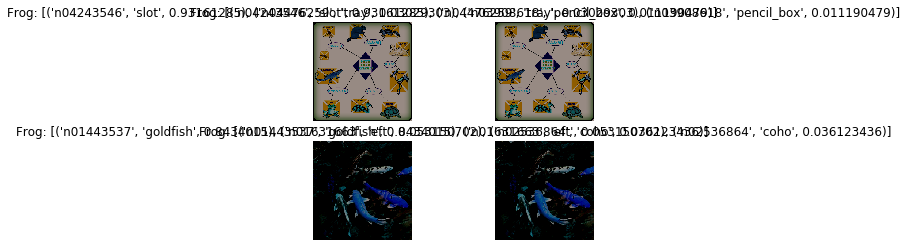

In [51]:
f, axarr = plt.subplots(2,2)

imgs, frogs = display_predictions(absolute_image_paths[0]['animal pond'])

for x,y in [(0,0),(0,1), (1,0), (1,1)]:  
    axarr[x,y].imshow(np.squeeze(imgs[x], axis=0) / 255)
    axarr[x,y].set_title(f"Frog: {frogs[x]}")
    axarr[x,y].axis('off')

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

Dimensionality reduction for images.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
Predictive modeling with scikit-learn
- What area of Data Science would you most like to learn more about, and why?
Object detection
- Where do you think Data Science will be in 5 years?
Hopefully further advanced with regards to object detection to accelerate 
 autonomous vehicles
- What are the threats posed by AI to our society?
Even with ethical rules coded into the structure of the AI, random corruption of data 
 exists and IMO can be considered a type of evolution/natural variance. Most situations
 will end up causing failure (much like stillborn/defect-ridden babies). There could be
 a single case out of all the AI implementation which has corrupted code that runs in a
 manner that goes contrary to the coded ethics. If not software encoded and using a
 dedicated chip instead, that chip can malfunction/break. Essentially, anything is 
 possible with that corruption and can lead to SKYNET!!!!!!
- How do you think we can counteract those threats? 
Targeted EMP weaponry
- Do you think achieving General Artifical Intelligence is ever possible?
Yes. In the same way there are scales of intelligence between all creatures, there can
 be a wide array of intelligence for AI. Just a matter of creative coders taking action.
 
A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [52]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")